## 1 Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_US=pd.read_csv(r"C:\Users\eniad\Downloads\Achievement 6\02 Data\Original Data\US birth numbers.csv",index_col=False)

In [3]:
df_US.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


# 2 Data Cleaning

In [4]:
df_US.columns

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')

In [5]:
#check for missing values
df_US.isnull().sum() # No missing values

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64

In [6]:
#Checking duplicates
dups=df_US.duplicated()

In [7]:
dups.shape # No duplicates found

(5496,)

C:\Users\eniad\AppData\Local\Temp\ipykernel_41688\419788621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_US['Average Birth Weight (g)'], bins=25)


<Axes: xlabel='Average Birth Weight (g)', ylabel='Density'>

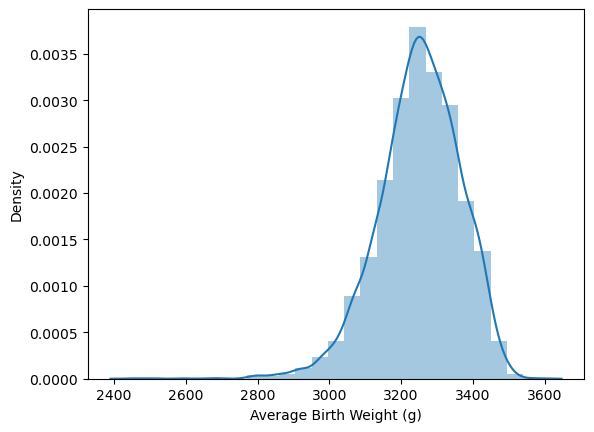

In [8]:
# Extreme values
sns.distplot(df_US['Average Birth Weight (g)'], bins=25)

In [9]:
# Some of the outliers in the high values may need to be removed, but let's try without doing so first.
df_US['Average Birth Weight (g)'].mean() # Check the mean

3250.8876273653564

In [10]:
df_US['Average Birth Weight (g)'].median() # Check the median

3256.0

In [11]:
df_US['Average Birth Weight (g)'].max() # Check the max

3585.7

# 3 Data prep for regression Analysis

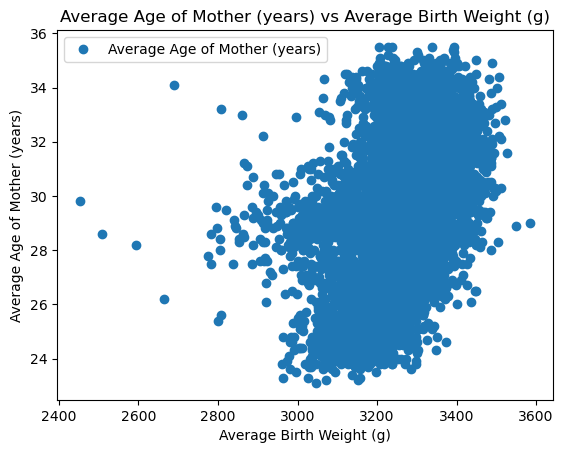

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df_US.plot(x ='Average Birth Weight (g)' , y='Average Age of Mother (years)',style='o') # The style option creates a scatterplot; without it, we only have lines.\n",
plt.title('Average Age of Mother (years) vs Average Birth Weight (g)') 
plt.xlabel('Average Birth Weight (g)') 
plt.ylabel('Average Age of Mother (years)') 
plt.show()

Increase in birth weight increases the average age of Mother 

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df_US['Average Birth Weight (g)'].values.reshape(-1,1)
y = df_US['Average Age of Mother (years)'].values.reshape(-1,1)

In [14]:
X

array([[3116.9],
       [3040. ],
       [3080. ],
       ...,
       [3249.3],
       [3262. ],
       [3177.5]])

In [15]:
y

array([[27.8],
       [24.1],
       [25.4],
       ...,
       [33. ],
       [33.3],
       [29.2]])

In [16]:
# Split data into a training set and a test set.\n",
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04 Regression Analysis

In [17]:
# Create a regression object
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [18]:
# Fit the regression object onto the training set.\n",
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.\n",
y_predicted = regression.predict(X_test)

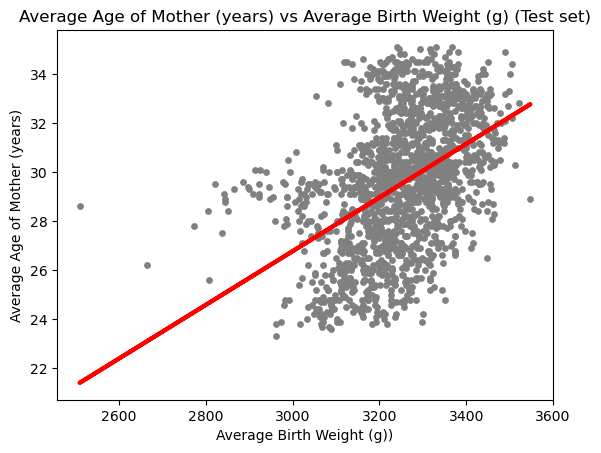

In [20]:
# Create a plot that shows the regression line from the model on the test set.\n",
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Age of Mother (years) vs Average Birth Weight (g) (Test set)')
plot_test.xlabel('Average Birth Weight (g))')
plot_test.ylabel('Average Age of Mother (years)')
plot_test.show()

The red regression line doesnt perfectly cover all the points. In the area where  average birth weight is around 3000, there are still many points with low average age of Mother which contradict my hypothesis of "Increase in birth weight increases the Average age of Mother. 


In [21]:
# Create objects that contain the model summary statistics.\n",
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.\n",
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0109349]]
Mean squared error:  6.105962501904035
R2 score:  0.19154081764950992


In [23]:
#Compare the predicted y values with the actual y values in a dataframe.
y_predicted

array([[28.02005476],
       [29.53781942],
       [28.47494676],
       ...,
       [30.93092618],
       [27.43285042],
       [29.39566567]])

In [24]:
# Create a dataframe comparing the actual and predicted values of y.\n",
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,26.7,28.020055
1,30.4,29.537819
2,29.2,28.474947
3,30.7,28.230005
4,30.3,30.866410
5,30.1,29.596868
6,32.2,30.691452
7,32.0,29.302719
8,33.2,30.742846
9,24.3,29.053403


There is an obvious difference the actual and predicted y values. This means the model is not doing a great job of explaining the relatioship between average age age of mother and average birth weight.



##### Compare how the regression fits the training set

In [25]:
# Predict.\n",
y_predicted_train = regression.predict(X_train) # This is predicting X_train!
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.\n",
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0109349]]
Mean squared error:  6.265235388624896
R2 score:  0.19637632112775827


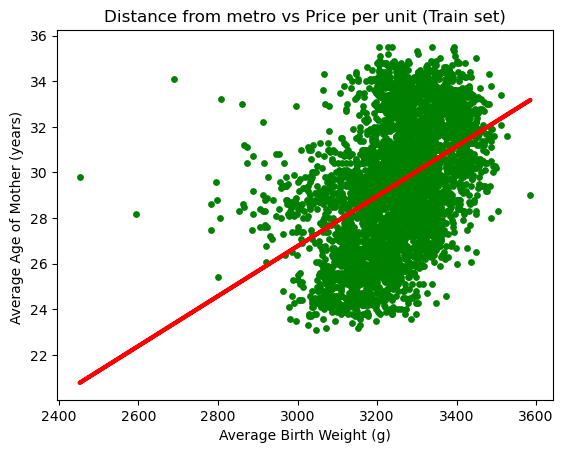

In [27]:
# Visualizing the training set results.\n",
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Train set)')
plot_test.xlabel('Average Birth Weight (g)')
plot_test.ylabel('Average Age of Mother (years) ')
plot_test.show()  

There is a no much of a difference between the training set and test set because the R2 = 0.19 on both occasion even though the R2 value indicate a poor fit because it is closer to zero. 